# TOPIC: EMPLOYEE ATTRITION PREDICTION
## SUBJECT: PREDICTIVE ANALYTICS
### SUBMITTED BY:
### 1.	NIRJA RAJEEV – 2024H1540801P
### 2.  KARTIK VIJAY BADKAS - 2024H1540809P
### 3.	SATHEESH M K - 2024H1540810P
### 4.	SARVESH KULKARNI - 2024H1540820P
### 5.	SAKET PITALE - 2024H1540836P

# Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,auc,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load & display dataset

In [2]:
file_path = "C:/Users/Saket/OneDrive/Desktop/Predictive Project/Employee-Attrition.csv"
df = pd.read_csv(file_path)
# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None,
    Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    ...  RelationshipSatisfaction StandardHours  Stoc

# Cleaning the Dataset

In [3]:
df_cleaned = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
# Encode categorical variables
for column in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

# Correlation matrix

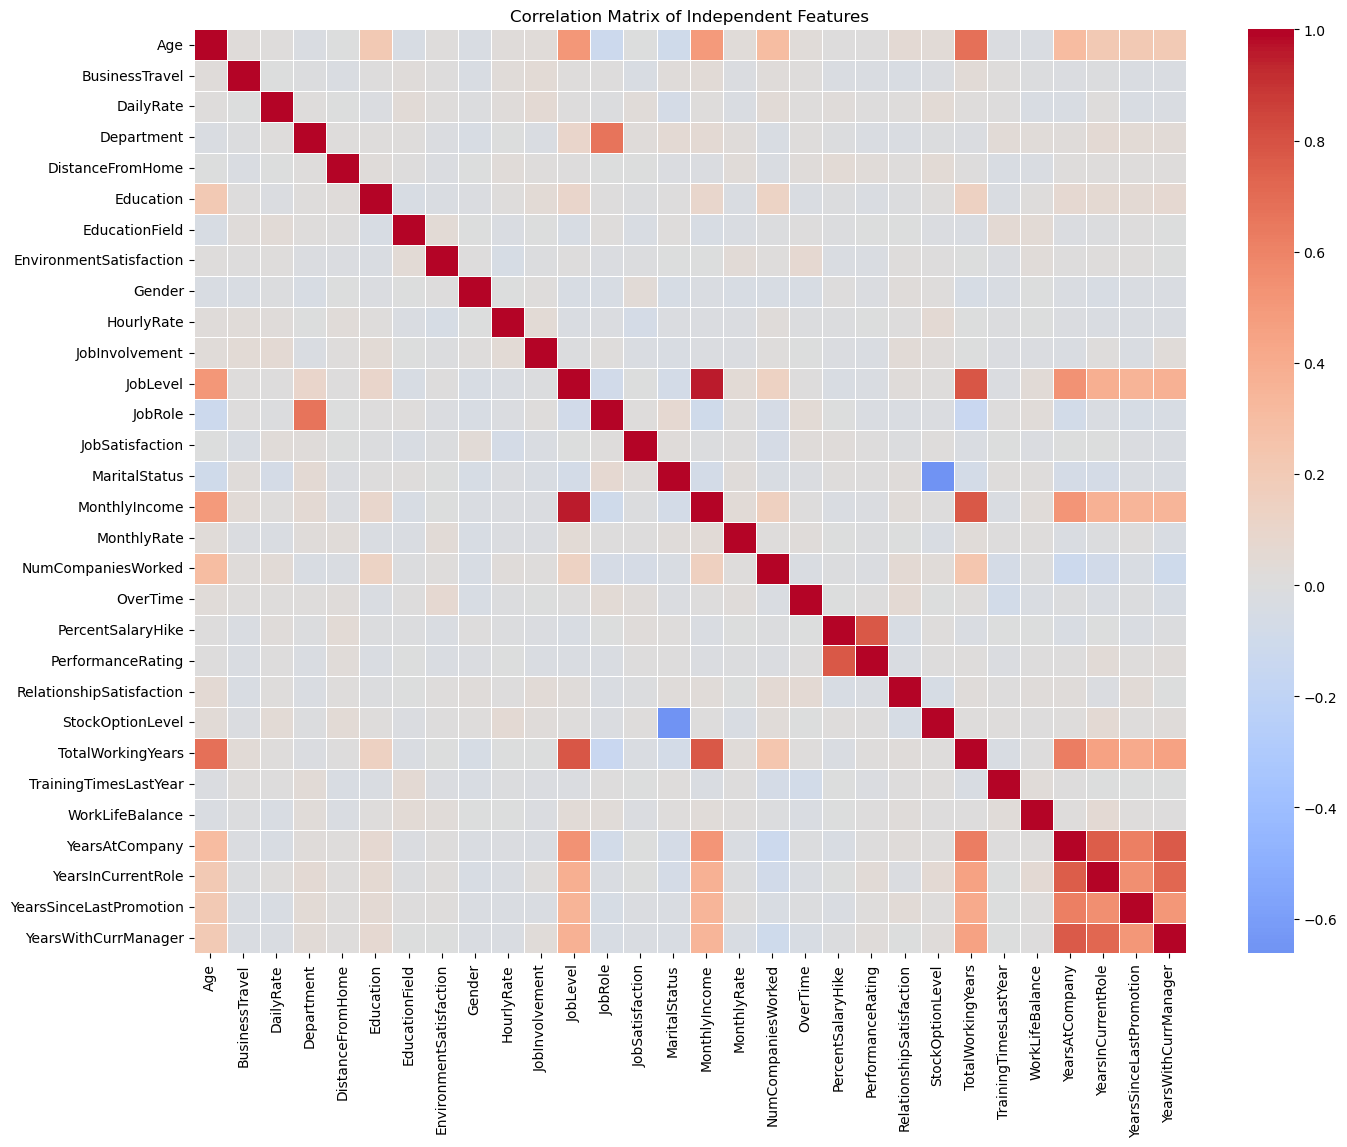

In [4]:
C = df_cleaned.drop("Attrition", axis=1)

# Compute the correlation matrix
corr_matrix = C.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Independent Features")
plt.show()

# Drop irrelevant columns

In [5]:
df = df.drop(columns=["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"])

# Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target variable

In [6]:
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target

# Normalize numerical features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# logistic regression

In [8]:
# Fit logistic regression model
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

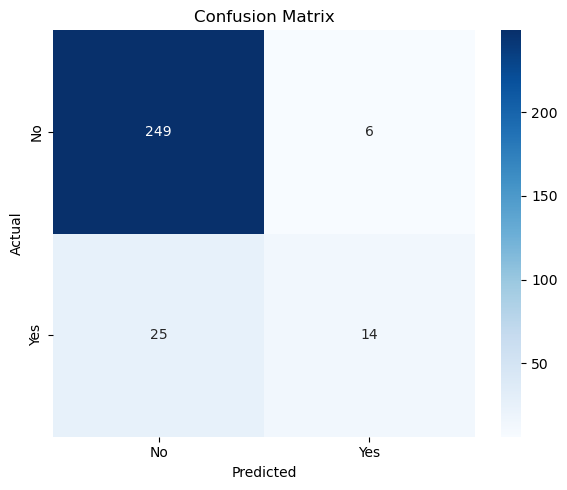

              precision    recall  f1-score   support

          No       0.91      0.98      0.94       255
         Yes       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

classification_report_text = classification_report(y_test, y_pred, target_names=["No", "Yes"])
print(classification_report_text)

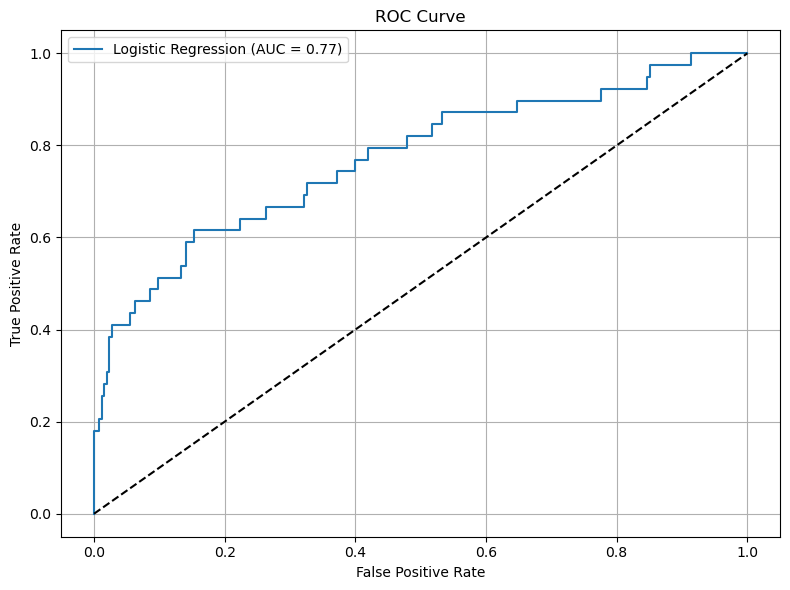

In [10]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SVM model

In [11]:
# Train SVM model
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

In [12]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

print(report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       1.00      0.15      0.27        39

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



# Decision Tree

In [13]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt, report_dt

print(accuracy_dt)
print(report_dt)

0.7993197278911565
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294



# Random Forest

In [14]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [15]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

print(accuracy)
print(report)

0.8809523809523809
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



# Feature Importance Plot

<ipython-input-14-a656f134113f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


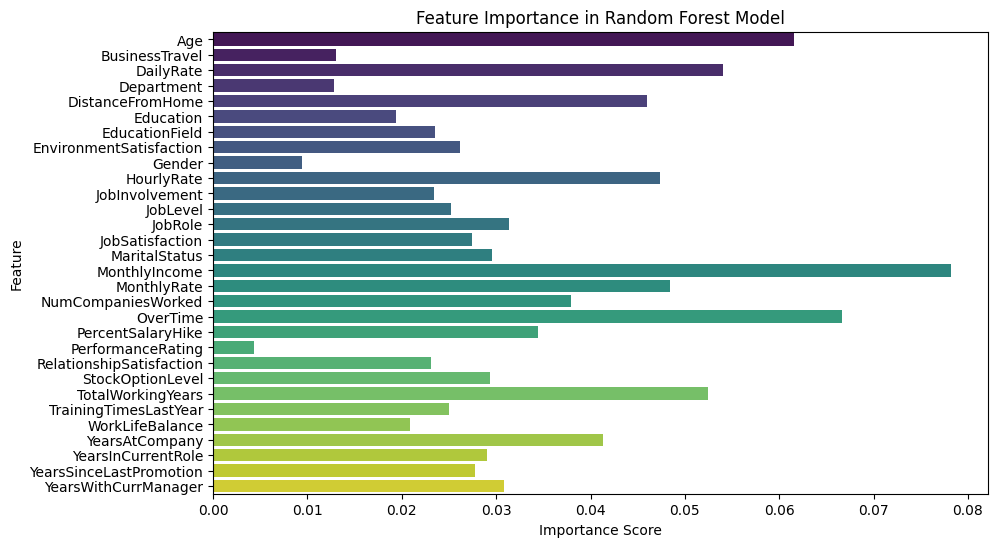

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()